In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ast
import matplotlib.pyplot as plt
Z = 20

In [2]:
def from_np_array(array_string):
    array_string = ','.join(array_string.replace('[ ', '[').split())
    return np.array(ast.literal_eval(array_string))

In [3]:
def rank_metric(colname, data):
    mean_col = colname + '_Mean'
    std_col = colname + '_Std'
    rank_col = colname + '_Rank'
    rank_std_up_col = colname + '_Rank_Std_up'
    rank_std_down_col = colname + '_Rank_Std_down'
    Rank_Std_up = []
    Rank_Std_down = []
    
    data = data.sort_values(mean_col)
    data[rank_col] = np.argsort(-1*data[mean_col])
    
    for i in range(len(data)):
        lower_than = np.sum((data[mean_col].iloc[i]+data[std_col].iloc[i]) >= (data[mean_col].iloc[i:]-data[std_col].iloc[i:]))-1 #-1 to not count itself
        Rank_Std_up.append(lower_than)
        greater_than = np.sum((data[mean_col].iloc[i]-data[std_col].iloc[i]) <= (data[mean_col].iloc[:i]+data[std_col].iloc[:i])) #-1 is absent because of slicing open/closed limits
        Rank_Std_down.append(greater_than)
        data['menos'] = data[mean_col]-data[std_col]
        data['mas'] = data[mean_col]+data[std_col]
    data[rank_std_up_col] = Rank_Std_up
    data[rank_std_down_col] = Rank_Std_down
    return data.sort_values('Act_Mean', ascending=False)

In [4]:
numpy_cols = ['Color','Score']
converters ={**dict.fromkeys(numpy_cols, from_np_array)}

In [5]:
"""data34 = pd.read_csv("S34/Weighted_fraction/DATA.csv", converters=converters)
data34.rename(columns={'Score':'WFs'}, inplace=True)
data34['WFs_Mean'] = data34.WFs.apply(np.mean)
data34['WFs_Std'] = data34.WFs.apply(np.std)"""

data31 = pd.read_csv("S31/Weighted_fraction/DATA.csv", converters=converters)
data31.rename(columns={'Score':'WFs'}, inplace=True)
data31['WFs_Mean'] = data31.WFs.apply(np.mean)
data31['WFs_Std'] = data31.WFs.apply(np.std)

data36 = pd.read_csv("S36/DATA.csv", converters=converters)
data36.rename(columns={'Score':'DGs'}, inplace=True)
data36['DGs_Mean'] = data36.DGs.apply(np.mean)
data36['DGs_Std'] = data36.DGs.apply(np.std)

#DATA = pd.concat((data34,data36), axis=1)
DATA = pd.concat((data31,data36), axis=1)
DATA = DATA.loc[:,~DATA.columns.duplicated()]

DATA = rank_metric('WFs', data=DATA)
DATA = rank_metric('DGs', data=DATA)

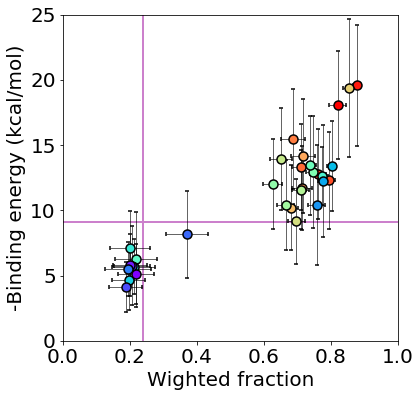

In [6]:
fig = plt.figure(figsize=(6,6))
ax = plt.axes()
ax.set_xlim((0,1))
ax.set_ylim((0,25))
ax.set_xlabel("Wighted fraction", fontsize=Z)
ax.set_ylabel("-Binding energy (kcal/mol)", fontsize=Z)
ax.tick_params(labelsize=Z)
ax.axvline(0.24, lw=2, zorder=0, c=(0.8,0.5,0.8)) #0.24 is the best for S31-33 Weighted fraction
ax.axhline(9.09, lw=2, zorder=1, c=(0.8,0.5,0.8)) #9.09 is the best for S36 Pulling
for wf, wf_std, dg, dg_std, c in zip(DATA.WFs_Mean, DATA.WFs_Std, DATA.DGs_Mean, DATA.DGs_Std, DATA.Color):
    ax.errorbar(wf, dg, xerr=wf_std, yerr=dg_std, c=c, fmt='o', ms=9, mec='k', mew=1.5, zorder=50, elinewidth=0.6, ecolor='k', capsize=2)
plt.show()
plt.close()

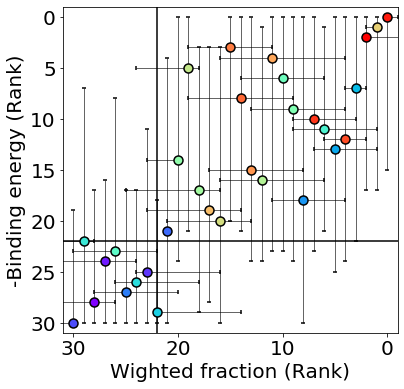

In [14]:
fig = plt.figure(figsize=(6,6))
ax = plt.axes()
ax.set_xlim((31,-1))
ax.set_ylim((31,-1))
ax.axhline(22, lw=1.5, c='k')
ax.axvline(22, lw=1.5, c='k')
ax.set_xlabel("Wighted fraction (Rank)", fontsize=Z)
ax.set_ylabel("-Binding energy (Rank)", fontsize=Z)
ax.tick_params(labelsize=Z)
for wfr, wfr_std_up, wfr_std_down, dgr, dgr_std_up, dgr_std_down, c in zip(DATA.WFs_Rank, DATA.WFs_Rank_Std_up, DATA.WFs_Rank_Std_down, DATA.DGs_Rank, DATA.DGs_Rank_Std_up, DATA.DGs_Rank_Std_down, DATA.Color):
    ax.errorbar(wfr, dgr, xerr=[[wfr_std_down], [wfr_std_up]], yerr=[[dgr_std_up], [dgr_std_down]], c=c, fmt='o', ms=9, mec='k', mew=1.5, zorder=50, elinewidth=0.6, ecolor='k', capsize=2)
plt.show()
plt.close()